<br>
<br>

![](https://cdn.pixabay.com/photo/2012/03/04/01/01/father-22194_1280.jpg)

<br>
<H1><center>Deep Learning for Home Loan Approval</center></H1>

<H2>Abstract</H2>
    
This notebook is dedicated to application of an advanced analysis of home loan approval.

<H2>Features:</H2>

Person ID: An identifier for each individual;<br>
Gender: The gender of the person (Male/Female);<br>
Age: The age of the person in years;<br>
Occupation: The occupation or profession of the person;<br>
Sleep Duration (hours): The number of hours the person sleeps per day;<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10;<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily;<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10;<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight);<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure;<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute;<br>
Daily Steps: The number of steps the person takes per day;<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


<H2>Sleep Disorder (Target):</H2>

First analyses: None: 0 ; Sleep disorder: 1.

Second analyses: Insomnia: 0; Sleep Apnea: 1.



<H2>Introduction</H2>
    
Sleep disorder refers to conditions that affect sleep quality that may affect the life of a person. These disorders can contribute to other medical problems, and some may also be symptoms for underlying mental health issues.

This lab will show you how to upload a dataset from Kaggle (the original dataset is from https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset by LAKSIKA THARMALINGAM, transform them, and determine the basic features that may have influence some Sleep Disorder.

We will use some visualization tools to measure the impact of the some features. Deep learning and TensorFlow to forecasting the approval and pyspark to make a broad understanding of machine learning.

<H2>Objectives</H2>

Create visualization for the features and the loan's approval.

Prepare the features and the targets for the learning process.

Build a classification using Keras, TensorFlow.

This Notebook will be uploaded to Kaggle and Github.

<H2>Required libraries import</H2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import opendatasets as od
import os
import category_encoders as ce
from sklearn.preprocessing import LabelBinarizer


%matplotlib inline

## Extracting and Loading the Data

Data was first downloaded from kaggle and saved in my private machine.

In [3]:
#!pip install opendatasets

In [4]:
od.download("https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset", force=False)

Skipping, found downloaded files in ".\sleep-health-and-lifestyle-dataset" (use force=True to force download)


In [5]:
os.listdir((r'C:\Users\User\sleep-health-and-lifestyle-dataset'))

['Sleep_health_and_lifestyle_dataset.csv']

In [6]:
df = pd.read_csv(r'C:\Users\User\sleep-health-and-lifestyle-dataset\Sleep_health_and_lifestyle_dataset.csv')

In [7]:
df.columns = df.columns.str.replace(' ', '_')

In [8]:
df

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Checking the data

Looking for null values and the type of the data

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

The dataset has no null values

<h2 id="discriptive_statistics">Descriptive Statistical Analysis</h2>

<p>Let's take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


<h2 id="indicator">Categorical features</h2>

<p>
    Some of the features in the dataset is categorical, they are in a object type, like gender has two unique values: "Male" or "Female". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "gender" to indicator variables.
</p>

<p>
    The pandas method 'get dummies' will assign numerical values of all features, a one fot encode, turning all the values in 0 and 1. All the values will be turned into a column 0 will be that the feature is not present, 1 the feature is present.
</p>

In [10]:
#Turn Blood Pressure into a numerical value (Mean Pressure)

#Creating a Systolic_Blood_Pressure and a Diastolic_Blood_Pressure column from Blood Pressure
df[['Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure']] = df["Blood_Pressure"].apply(lambda x: pd.Series(str(x).split("/")))

#Turning into numerical
df[['Systolic_Blood_Pressure','Diastolic_Blood_Pressure']] = df[['Systolic_Blood_Pressure','Diastolic_Blood_Pressure']].astype(str).astype(int)

#Creating a new value from both columns
df["Mean_Pressure"] = df['Diastolic_Blood_Pressure']*2 + (df['Systolic_Blood_Pressure']/3)

#Deleting unnecessary attributes
df.drop("Blood_Pressure", axis = 1, inplace=True)
df.drop('Systolic_Blood_Pressure', axis = 1, inplace=True)
df.drop("Diastolic_Blood_Pressure", axis = 1, inplace=True)
df.drop("Person_ID", axis = 1, inplace=True)

df.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Mean_Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,208.000000
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,201.666667
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,201.666667
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,226.666667
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,226.666667


In [11]:
#Turning Gender in 0 and 1 using get dummies
#Male = 0
#Female = 1

df.replace({'Male':0,'Female':1},inplace=True)

df.drop("Occupation", axis = 1, inplace=True)

#Turning BMI Category in 0 and 1 using get dummies
#Normal = 0
#Overweight = 1
#Normal Weight = 2
#Obese = 3

df.replace({'Normal':0,'Overweight':1,'Normal Weight':2,'Obese':3},inplace=True)

In [12]:
#Create a new columns from Sleep Disorder for use in another model
df['Type_of_disorder'] = df['Sleep_Disorder']

#Turning Sleep Disorder in None = 0 and Sleep Apnea and Insomnia both in 1
df['Sleep_Disorder'].replace({'None': 0 ,'Sleep Apnea': 1 ,'Insomnia': 1 },inplace=True)

#Turning Sleep Apnea in 0 and Insomnia in 1 for another model
df['Type_of_disorder'].replace({'None': 2, 'Sleep Apnea': 0 ,'Insomnia': 1 },inplace=True)

In [13]:
#Creating a dataframe only with Sleep Disorder present, the model will predict wich disorder
df_Disorder = df.loc[df['Sleep_Disorder']==1]

In [14]:
df.head()

,Gender,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Mean_Pressure,Type_of_disorder
0,0,27,6.1,6,42,6,1,77,4200,0,208.000000,2
1,0,28,6.2,6,60,8,0,75,10000,0,201.666667,2
2,0,28,6.2,6,60,8,0,75,10000,0,201.666667,2
3,0,28,5.9,4,30,8,3,85,3000,1,226.666667,0
4,0,28,5.9,4,30,8,3,85,3000,1,226.666667,0


In [15]:
df_Disorder.head()

,Gender,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Mean_Pressure,Type_of_disorder
3,0,28,5.9,4,30,8,3,85,3000,1,226.666667,0
4,0,28,5.9,4,30,8,3,85,3000,1,226.666667,0
5,0,28,5.9,4,30,8,3,85,3000,1,226.666667,1
6,0,29,6.3,6,40,7,3,82,3500,1,226.666667,1
16,1,29,6.5,5,40,7,2,80,4000,1,218.000000,0


<h2 id="Correlation">Correlation</h2>

Using correlation to define wich attribute use to train the model

In [16]:
df.corr()

,Gender,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Mean_Pressure,Type_of_disorder
Gender,1.000000,0.596358,0.121579,0.291366,-0.001454,-0.396018,0.209986,-0.217105,0.014509,0.285824,0.259364,-0.362591
Age,0.596358,1.000000,0.344709,0.473734,0.178993,-0.422344,0.240220,-0.225606,0.057973,0.432007,0.598253,-0.487832
Sleep_Duration,0.121579,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.235677,-0.516455,-0.039533,-0.338622,-0.169627,0.239109
Quality_of_Sleep,0.291366,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.261287,-0.659865,0.016791,-0.310984,-0.112578,0.213003
Physical_Activity_Level,-0.001454,0.178993,0.212360,0.192896,1.000000,-0.034134,0.041080,0.136971,0.772723,0.069787,0.363753,-0.236560
Stress_Level,-0.396018,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.109951,0.670026,0.186829,0.181685,0.094084,-0.151893
BMI_Category,0.209986,0.240220,-0.235677,-0.261287,0.041080,0.109951,1.000000,0.529144,-0.193955,0.573505,0.480002,-0.539633
Heart_Rate,-0.217105,-0.225606,-0.516455,-0.659865,0.136971,0.670026,0.529144,1.000000,-0.030309,0.330254,0.276161,-0.384343
Daily_Steps,0.014509,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.193955,-0.030309,1.000000,-0.026575,0.218815,-0.112053
Sleep_Disorder,0.285824,0.432007,-0.338622,-0.310984,0.069787,0.181685,0.573505,0.330254,-0.026575,1.000000,0.705597,-0.917111


The most correlatad attribute with Sleep Disorder labeling is Mean Pressure.

Now let's create our Training and Testing

<h2 id="Creating Datasets">Creating the Training and Test Datasets</h2>

In [20]:
#Creation of the model using the attribute with the higher correlation with Sleep Disorder
y = df[["Sleep_Disorder"]]
X = df[["Age","Sleep_Duration","Quality_of_Sleep","BMI_Category","Heart_Rate","Mean_Pressure"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print("Shape for the Y: ",y.shape)
print("Shape for the X in training: ",X_train.shape); print("Shape for the X in testing: ",X_test.shape)
print("Shape for the y in training: ",y_train.shape); print("Shape for the y in testing: ",y_test.shape)

Shape for the Y:  (374, 1)
Shape for the X in training:  (299, 6)
Shape for the X in testing:  (75, 6)
Shape for the y in training:  (299, 1)
Shape for the y in testing:  (75, 1)


<h2 id="Define">Define, Compile, and Fit the Keras Classification Model</h2>

Let's train our model, providing the argument epochs, which represents the number of training iterations. We have taken 100 epochs.

The dataset has the marjority of the "None" in Sleep Disorder. In a total of 374 rows, category 0 (None Sleep Disorder) represents 58,5% of the data, the model has to be above that number by large.

We’ll use StandardScaler from Scikit-Learn to fit and transform the training data and to apply the transformation to the testing data:

In [21]:
#Scaling X from our training dataset for the model
tf.random.set_seed(0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_val_scaled = scaler.transform(X_val)

In [22]:
from keras.losses import categorical_crossentropy

Here is the model, using sigmoid for binary classification.
To see the performance we will use the metric accuracy, and for the loss, because of the binary classification, the metric is binary crossentropy.

We have defined our deep learning model architecture,'binary_crossentropy' as our loss measure, 'adam' as the optimizer algorithm with the learning rate of 0.005, and 'accuracy' as the evaluation metric. 

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test_scaled,y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
19/19 [==============================] - 1s 18ms/step - loss: 0.3787 - accuracy: 0.8963 - val_loss: 0.2464 - val_accuracy: 0.9600
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9298 - val_loss: 0.2887 - val_accuracy: 0.9467
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.9331 - val_loss: 0.2644 - val_accuracy: 0.9600
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9365 - val_loss: 0.2827 - val_accuracy: 0.9600
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9398 - val_loss: 0.3012 - val_accuracy: 0.9600
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9398 - val_loss: 0.3185 - val_accuracy: 0.9600


<h2 id="Predict">Predict on the Test Data and Compute Evaluation Metrics:</h2>


The first line of code predicts on the train data, while the second line evaluates the model, and the third line prints the accuracy and error on the training data.

The same is repeated in the fourth, fifth and sixth lines of code which is performed on the test data.

In [24]:
pred_train= model.predict(X_train_scaled)
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}%'.format((scores[1]*100), (1 - scores[1])*100))   
 
pred_test= model.predict(X_test_scaled)
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}%'.format((scores[1]*100), (1 - scores[1])*100))

Accuracy on training data: 93.64548325538635% 
 Error on training data: 6.3545167446136475%
Accuracy on test data: 95.99999785423279% 
 Error on test data: 4.000002145767212%


The accuracy above 90% both in training and testing, the model is probably not overfitting.

Checking again to see if we have overfitting

In [25]:
from sklearn.model_selection import KFold

y = df[["Sleep_Disorder"]]
X = df[["Age","Sleep_Duration","Quality_of_Sleep","BMI_Category","Heart_Rate","Mean_Pressure"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print("Shape for the Y: ",y.shape)
print("Shape for the X in training: ",X_train.shape); print("Shape for the X in testing: ",X_test.shape)
print("Shape for the y in training: ",y_train.shape); print("Shape for the y in testing: ",y_test.shape)

#Scaling X from our training dataset for the model
tf.random.set_seed(0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

y_trainValues = y_train.values

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
val_loss_list = []
for train_index, val_index in kfold.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_trainValues[train_index], y_trainValues[val_index]

    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=10,
        validation_data=(X_val_fold, y_val_fold)
    )
    val_loss_list.append(history.history['val_loss'][-1])

print(f"Mean values of loss in cross validation: {np.mean(val_loss_list)}")

Shape for the Y:  (374, 1)
Shape for the X in training:  (299, 6)
Shape for the X in testing:  (75, 6)
Shape for the y in training:  (299, 1)
Shape for the y in testing:  (75, 1)
Epoch 1/10
8/8 [==============================] - 1s 20ms/step - loss: 0.6442 - accuracy: 0.6402 - val_loss: 0.5320 - val_accuracy: 0.8833
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4958 - accuracy: 0.7908 - val_loss: 0.3843 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3995 - accuracy: 0.8828 - val_loss: 0.3699 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.9163 - val_loss: 0.4175 - val_accuracy: 0.9000
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.9079 - val_loss: 0.4565 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.9121 - val_loss: 0.4431 - val_accuracy:

In [26]:
pred_train= model.predict(X_train_scaled)
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}%'.format((scores[1]*100), (1 - scores[1])*100))   
 
pred_test= model.predict(X_val_fold)
scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
print('Accuracy on validation data: {}% \n Error on validation data: {}%'.format((scores[1]*100), (1 - scores[1])*100))    
    
pred_test= model.predict(X_test_scaled)
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on testing data: {}% \n Error on test data: {}%'.format((scores[1]*100), (1 - scores[1])*100))

Accuracy on training data: 93.97993087768555% 
 Error on training data: 6.020069122314453%
Accuracy on validation data: 96.61017060279846% 
 Error on validation data: 3.389829397201538%
Accuracy on testing data: 95.99999785423279% 
 Error on test data: 4.000002145767212%


The model here was not that diferent, having similar results is good sign.

<h2 id="Confusion Matrix">Confusion Matrix:</h2>


A confusion matrix to compare the prediction from the test dataset with labels.

In [27]:
predictions = model.predict(X_test_scaled)

In [28]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [29]:
print(confusion_matrix(y_test, prediction_classes))

[[44  2]
 [ 1 28]]


In [30]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Normal Sleep', 'Sleep Disorder']); ax.yaxis.set_ticklabels(['Normal Sleep', 'Sleep Disorder'])

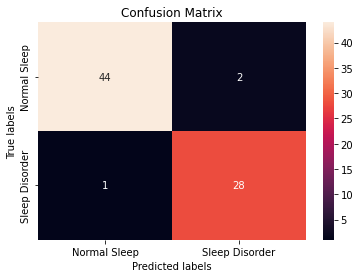

In [31]:
plot_confusion_matrix(y_test,prediction_classes)

In [32]:
y_test['Sleep_Disorder'].value_counts()

0    46
1    29
Name: Sleep_Disorder, dtype: int64

<h2 id="Predict second analysis">Prediction for the second dataframe - type of Sleep Disorder:</h2>


Creation for a model to predict the type of Sleep Disorder using the dataframe df_Disorder.

In [33]:
from sklearn.model_selection import KFold

y = df_Disorder[["Type_of_disorder"]]
X = df_Disorder[["Age","Sleep_Duration","Quality_of_Sleep","BMI_Category","Heart_Rate","Mean_Pressure"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print("Shape for the Y: ",y.shape)
print("Shape for the X in training: ",X_train.shape); print("Shape for the X in testing: ",X_test.shape)
print("Shape for the y in training: ",y_train.shape); print("Shape for the y in testing: ",y_test.shape)

#Scaling X from our training dataset for the model
tf.random.set_seed(0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

y_trainValues = y_train.values

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
val_loss_list = []
for train_index, val_index in kfold.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_trainValues[train_index], y_trainValues[val_index]

    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=100,
        validation_data=(X_val_fold, y_val_fold)
    )
    val_loss_list.append(history.history['val_loss'][-1])

print(f"Média dos valores de perda na validação cruzada: {np.mean(val_loss_list)}")

Shape for the Y:  (155, 1)
Shape for the X in training:  (124, 6)
Shape for the X in testing:  (31, 6)
Shape for the y in training:  (124, 1)
Shape for the y in testing:  (31, 1)
Epoch 1/100
4/4 [==============================] - 1s 46ms/step - loss: 0.6907 - accuracy: 0.5455 - val_loss: 0.6853 - val_accuracy: 0.5200
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6570 - accuracy: 0.5960 - val_loss: 0.6668 - val_accuracy: 0.7200
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6113 - accuracy: 0.6768 - val_loss: 0.6523 - val_accuracy: 0.7600
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5912 - accuracy: 0.6970 - val_loss: 0.6466 - val_accuracy: 0.7200
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5976 - accuracy: 0.6465 - val_loss: 0.6418 - val_accuracy: 0.7200
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7042 - accuracy: 0.5556 - val_loss: 0.6246 - val_ac

4/4 [==============================] - 0s 7ms/step - loss: 0.2350 - accuracy: 0.8990 - val_loss: 0.4016 - val_accuracy: 0.7600
Epoch 59/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2010 - accuracy: 0.8889 - val_loss: 0.4039 - val_accuracy: 0.7600
Epoch 60/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2300 - accuracy: 0.8788 - val_loss: 0.4036 - val_accuracy: 0.7600
Epoch 61/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2221 - accuracy: 0.9091 - val_loss: 0.4065 - val_accuracy: 0.7600
Epoch 62/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3689 - accuracy: 0.8788 - val_loss: 0.3967 - val_accuracy: 0.8000
Epoch 63/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2525 - accuracy: 0.8586 - val_loss: 0.3717 - val_accuracy: 0.8000
Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2422 - accuracy: 0.9091 - val_loss: 0.3401 - val_accuracy: 0.8000
Epoch 65/100
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 0.2735 - accuracy: 0.8687 - val_loss: 0.0743 - val_accuracy: 1.0000
Epoch 17/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2010 - accuracy: 0.8889 - val_loss: 0.0729 - val_accuracy: 1.0000
Epoch 18/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2996 - accuracy: 0.8788 - val_loss: 0.0729 - val_accuracy: 1.0000
Epoch 19/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1917 - accuracy: 0.8889 - val_loss: 0.0739 - val_accuracy: 0.9600
Epoch 20/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2497 - accuracy: 0.8485 - val_loss: 0.0743 - val_accuracy: 0.9600
Epoch 21/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2276 - accuracy: 0.9192 - val_loss: 0.0756 - val_accuracy: 0.9600
Epoch 22/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2603 - accuracy: 0.8485 - val_loss: 0.0763 - val_accuracy: 0.9600
Epoch 23/100
4/4 [==============

4/4 [==============================] - 0s 9ms/step - loss: 0.2399 - accuracy: 0.8889 - val_loss: 0.1421 - val_accuracy: 0.8800
Epoch 75/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2599 - accuracy: 0.8687 - val_loss: 0.1548 - val_accuracy: 0.8800
Epoch 76/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2563 - accuracy: 0.8788 - val_loss: 0.1629 - val_accuracy: 0.8800
Epoch 77/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2455 - accuracy: 0.8990 - val_loss: 0.1660 - val_accuracy: 0.8800
Epoch 78/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2010 - accuracy: 0.9091 - val_loss: 0.1668 - val_accuracy: 0.8800
Epoch 79/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2341 - accuracy: 0.8990 - val_loss: 0.1648 - val_accuracy: 0.8800
Epoch 80/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2535 - accuracy: 0.8788 - val_loss: 0.1587 - val_accuracy: 0.8800
Epoch 81/100
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.1956 - accuracy: 0.9293 - val_loss: 0.1272 - val_accuracy: 0.9600
Epoch 33/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2060 - accuracy: 0.9192 - val_loss: 0.1249 - val_accuracy: 0.9600
Epoch 34/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2253 - accuracy: 0.8889 - val_loss: 0.1219 - val_accuracy: 0.9600
Epoch 35/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2370 - accuracy: 0.8687 - val_loss: 0.1207 - val_accuracy: 0.9600
Epoch 36/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1888 - accuracy: 0.9091 - val_loss: 0.1190 - val_accuracy: 0.9600
Epoch 37/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2842 - accuracy: 0.8485 - val_loss: 0.1186 - val_accuracy: 0.9600
Epoch 38/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2231 - accuracy: 0.8788 - val_loss: 0.1184 - val_accuracy: 0.9600
Epoch 39/100
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.2515 - accuracy: 0.8586 - val_loss: 0.1200 - val_accuracy: 0.9600
Epoch 91/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2261 - accuracy: 0.9091 - val_loss: 0.1195 - val_accuracy: 0.9600
Epoch 92/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2269 - accuracy: 0.8586 - val_loss: 0.1185 - val_accuracy: 0.9600
Epoch 93/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1936 - accuracy: 0.8889 - val_loss: 0.1164 - val_accuracy: 0.9600
Epoch 94/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2045 - accuracy: 0.9091 - val_loss: 0.1158 - val_accuracy: 0.9600
Epoch 95/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2309 - accuracy: 0.8990 - val_loss: 0.1143 - val_accuracy: 0.9600
Epoch 96/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1775 - accuracy: 0.9192 - val_loss: 0.1132 - val_accuracy: 0.9600
Epoch 97/100
4/4 [==============

4/4 [==============================] - 0s 8ms/step - loss: 0.1516 - accuracy: 0.9192 - val_loss: 0.4143 - val_accuracy: 0.7200
Epoch 49/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1455 - accuracy: 0.9495 - val_loss: 0.4134 - val_accuracy: 0.7200
Epoch 50/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1373 - accuracy: 0.9495 - val_loss: 0.4171 - val_accuracy: 0.7200
Epoch 51/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1540 - accuracy: 0.9091 - val_loss: 0.4217 - val_accuracy: 0.7200
Epoch 52/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1703 - accuracy: 0.9091 - val_loss: 0.4260 - val_accuracy: 0.7200
Epoch 53/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1741 - accuracy: 0.9394 - val_loss: 0.4191 - val_accuracy: 0.7200
Epoch 54/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1679 - accuracy: 0.9394 - val_loss: 0.4216 - val_accuracy: 0.7200
Epoch 55/100
4/4 [===============

4/4 [==============================] - 0s 7ms/step - loss: 0.2733 - accuracy: 0.9000 - val_loss: 0.0679 - val_accuracy: 0.9583
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2129 - accuracy: 0.8900 - val_loss: 0.0708 - val_accuracy: 0.9583
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2486 - accuracy: 0.8900 - val_loss: 0.0747 - val_accuracy: 0.9583
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2291 - accuracy: 0.8900 - val_loss: 0.0789 - val_accuracy: 0.9583
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2345 - accuracy: 0.8500 - val_loss: 0.0857 - val_accuracy: 0.9583
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1847 - accuracy: 0.9200 - val_loss: 0.0919 - val_accuracy: 0.9583
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2099 - accuracy: 0.8900 - val_loss: 0.0967 - val_accuracy: 0.9583
Epoch 13/100
4/4 [=================

4/4 [==============================] - 0s 7ms/step - loss: 0.1784 - accuracy: 0.9300 - val_loss: 0.1252 - val_accuracy: 0.9167
Epoch 65/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1646 - accuracy: 0.9100 - val_loss: 0.1342 - val_accuracy: 0.9167
Epoch 66/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2395 - accuracy: 0.8500 - val_loss: 0.1469 - val_accuracy: 0.9167
Epoch 67/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2078 - accuracy: 0.8800 - val_loss: 0.1572 - val_accuracy: 0.8750
Epoch 68/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1814 - accuracy: 0.9000 - val_loss: 0.1606 - val_accuracy: 0.8750
Epoch 69/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2020 - accuracy: 0.9000 - val_loss: 0.1616 - val_accuracy: 0.8750
Epoch 70/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2035 - accuracy: 0.8600 - val_loss: 0.1613 - val_accuracy: 0.8750
Epoch 71/100
4/4 [===============

In [34]:
pred_train= model.predict(X_train_scaled)
scores = model.evaluate(X_train_scaled, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}%'.format((scores[1]*100), (1 - scores[1])*100))   
 
pred_test= model.predict(X_val_fold)
scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
print('Accuracy on validation data: {}% \n Error on validation data: {}%'.format((scores[1]*100), (1 - scores[1])*100))    
    
pred_test= model.predict(X_test_scaled)
scores = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on testing data: {}% \n Error on test data: {}%'.format((scores[1]*100), (1 - scores[1])*100))

Accuracy on training data: 89.51612710952759% 
 Error on training data: 10.483872890472412%
Accuracy on validation data: 95.83333134651184% 
 Error on validation data: 4.166668653488159%
Accuracy on testing data: 90.32257795333862% 
 Error on test data: 9.677422046661377%


In [55]:
df_Disorder.head()

,Gender,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Mean_Pressure,Type_of_disorder
3,0,28,5.9,4,30,8,3,85,3000,1,226.666667,0
4,0,28,5.9,4,30,8,3,85,3000,1,226.666667,0
5,0,28,5.9,4,30,8,3,85,3000,1,226.666667,1
6,0,29,6.3,6,40,7,3,82,3500,1,226.666667,1
16,1,29,6.5,5,40,7,2,80,4000,1,218.000000,0


## Thank you